In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

#### **1.**
다음과 같은 prepare_data 함수를 이용하여 생성되는 가상의 학습표본 집합에 대해 학습한 후 결과를 시각화 할 수 있도록 실습 프로그램을 수정하고 그 결과를 고찰하라

In [13]:
def prepare_data(N):
    # N : 학습표본의 수
    # 클래스 0의 평균 좌표 : (1, 2)
    # 클래스 1의 평균 좌표 : (2, 1)
    C = np.array([[1,2], [2,1]])
    X = []
    y = []
    rnd = np.random.default_rng()
    # 각 클래스의 평균 좌표에 무작위 값을 더하여 학습표본 집합 생성
    for i in range(N):
        j = rnd.integers(0, 2)
        x = np.array(rnd.normal(loc=0.0, scale=0.2, size=2)) + C[j]
        X.append(x)
        y.append(j)
    return np.array(X), np.array(y), ['0', '1']

##### **수정된 코드**

In [43]:
def step(x):
    return int(x >= 0)

class Perceptron():
    def __init__(self, dim, activation):
        rnd = np.random.default_rng()
        self.dim = dim
        self.activation = activation
        # 가중치(w)와 바이어스(b)를 He normal 방식으로 초기화
        self.w = rnd.normal(scale = np.sqrt(2.0 / dim), size=dim)
        self.b = rnd.normal(scale = np.sqrt(2.0 / dim))
    
    def printW(self):
        for i in range(self.dim):
            print('  w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('  b = {:6.3f}'.format(self.b))

    def predict(self, x):  # numpy 배열 x에 저장된 표본의 출력 계산
        return np.array([self.activation(np.dot(self.w, x[i]) + self.b)
                          for i in range(len(x))])

    def fit(self, X, y, N, epochs, eta=0.01):
        # 학습표본의 인덱스를 무작위 순서로 섞음
        idx = list(range(N))
        np.random.shuffle(idx)
        X = np.array([X[idx[i]] for i in range(N)])
        y = np.array([y[idx[i]] for i in range(N)])

        f = 'Epochs = {:4d}    Loss = {:8.5f}'
        print('w의 초깃값  ', end='')
        self.printW()
        for j in range(epochs):
            for i in range(N):
                # x[i]에 대한 출력 오차 계산
                delta = self.predict([X[i]])[0] - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            # 학습 과정 출력
            if j < 10 or (j+1) % 100 == 0:
                loss = self.predict(X) - y
                loss = (loss * loss).sum() / N
                print(f.format(j+1, loss), end='')
                self.printW()

def visualize(net, X, y, multi_class, labels, class_id, colors, 
               xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 0.05 간격의 좌표값으로 나열
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
    y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)
    
    # x_lin과 y_lin의 격자좌표의 x와 y 값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)
    
    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])
    
    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k])
                            for k in range(len(y_hat))], dtype=int)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))
    
    # 출력할 그래프의 수평/수직 범위 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                     c = c, s = 5, alpha = 0.3, edgecolors = 'none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1],
                     c = c, s = 20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()


In [45]:
nSamples = 150
nDim = 2
target = '1'
X, y, labels = prepare_data(nSamples)
p = Perceptron(nDim, activation=step)
p.fit(X, y, 150, epochs=1000, eta=0.01)

w의 초깃값    w1 = -1.710  w2 =  1.290  b = -0.581
Epochs =    1    Loss =  0.97333  w1 = -0.785  w2 =  0.778  b = -0.441
Epochs =    2    Loss =  0.88000  w1 =  0.011  w2 =  0.186  b = -0.361
Epochs =    3    Loss =  0.17333  w1 =  0.184  w2 = -0.005  b = -0.341
Epochs =    4    Loss =  0.04667  w1 =  0.202  w2 = -0.017  b = -0.331
Epochs =    5    Loss =  0.02000  w1 =  0.216  w2 = -0.030  b = -0.321
Epochs =    6    Loss =  0.00667  w1 =  0.229  w2 = -0.032  b = -0.311
Epochs =    7    Loss =  0.00667  w1 =  0.228  w2 = -0.042  b = -0.311
Epochs =    8    Loss =  0.00667  w1 =  0.241  w2 = -0.044  b = -0.301
Epochs =    9    Loss =  0.00667  w1 =  0.239  w2 = -0.053  b = -0.301
Epochs =   10    Loss =  0.00667  w1 =  0.238  w2 = -0.063  b = -0.301
Epochs =  100    Loss =  0.00000  w1 =  0.260  w2 = -0.070  b = -0.281
Epochs =  200    Loss =  0.00000  w1 =  0.260  w2 = -0.070  b = -0.281
Epochs =  300    Loss =  0.00000  w1 =  0.260  w2 = -0.070  b = -0.281
Epochs =  400    Loss =  0.000

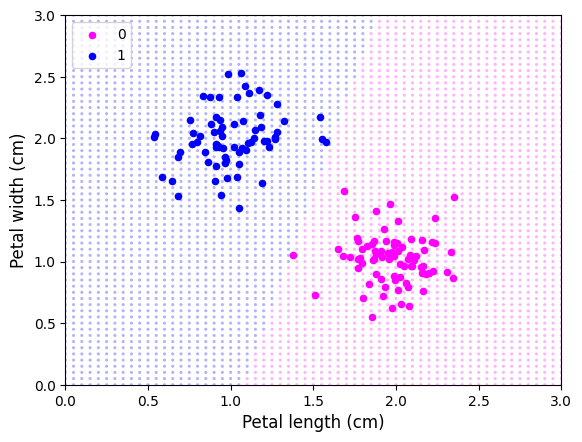

In [47]:
visualize(p, X, y,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='Petal length (cm)',
          ylabel='Petal width (cm)',
          legend_loc='upper left')